# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [5]:
df_raw = pd.read_csv("assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [6]:
# frequency table for prestige and whether or not someone was admitted
count = pd.Series(df["prestige"])
count = pd.DataFrame(count.value_counts())
count.columns = ["Frequency"]
count

,Frequency
2,148
3,121
4,67
1,61


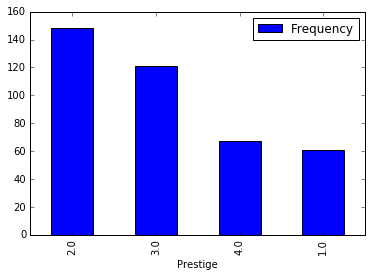

In [7]:
count.plot(kind="Bar")
plt.xlabel("Prestige")

## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [8]:
prest_dummies = pd.get_dummies(df["prestige"],prefix="prestige",prefix_sep="_")

#### 2.2 When modeling our class variables, how many do we need? 



Answer: We only need three, we're going to use 4 as our reference variable. So we can drop the 4th dummy variable since if 1,2 and 3 = '0' then we know it ='s 4

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

## Change Odds Ratio Calculation

In [9]:
from __future__ import division
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prest_dummies.ix[:, :"prestige_3.0"])
outC = len(handCalc)
#Could not think of a more efficient way to predict odds
odd1 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_1.0"]==1)])
no1 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_1.0"]==0)])
odd2 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_2.0"]==1)])
no2 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_2.0"]==0)])
odd3 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_3.0"]==1)])
no3 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_3.0"]==0)])
odd4 = len(handCalc[(handCalc["admit"]==1) & (handCalc["prestige_3.0"]==0) & (handCalc["prestige_2.0"]==0) &\
                    (handCalc["prestige_1.0"]==0)])
no4 = len(handCalc[(handCalc["admit"]==1) & ((handCalc["prestige_3.0"]==1) | (handCalc["prestige_2.0"]==1) |\
                    (handCalc["prestige_1.0"]==1))])

#Tried using iteritems for making these lists but had troble. I know there is a more efficient way
prest1 = len(handCalc[handCalc["prestige_1.0"]==1])
prest2 = len(handCalc[handCalc["prestige_2.0"]==1])
prest3 = len(handCalc[handCalc["prestige_3.0"]==1])
prest4 = len(handCalc[(handCalc["prestige_3.0"]==0) & (handCalc["prestige_2.0"]==0) &\
                    (handCalc["prestige_1.0"]==0)])
#Creating Lists
oddlist = [odd1, odd2, odd3, odd4]
nolist = [no1, no2, no3, no4]
prest_list = [prest1,prest2,prest3,prest4]
head_list = list(handCalc.columns[3:6])
head_list.append("prestige_4.0")
#Odds for getting in based on each prestige
for i in range(len(oddlist)):
    print "The odds of getting in to a school with %s are %f" % (head_list[i], oddlist[i]/prest_list[i])

                                                                               
print "\nThe odds ratio for each prestige level is: "
# Calculating odds ratio, i.e. the odds of getting in with prestige N vs. odds getting with without prestige "N"
print "Prestige 1: %f" % (odd1/no1)
print "Prestige 2: %f" % (odd2/no2)
print "Prestige 3: %f" % (odd3/no3)
print "Prestige 4: %f" % (odd4/no4)
#It appears I calculated the odds ratio against not getting in, is this not what was asked for?

The odds of getting in to a school with prestige_1.0 are 0.540984
The odds of getting in to a school with prestige_2.0 are 0.358108
The odds of getting in to a school with prestige_3.0 are 0.231405
The odds of getting in to a school with prestige_4.0 are 0.179104

The odds ratio for each prestige level is: 
Prestige 1: 0.354839
Prestige 2: 0.726027
Prestige 3: 0.285714
Prestige 4: 0.105263


In [10]:
#crosstab prestige 1 admission 
pd.crosstab(handCalc["admit"], handCalc["prestige_1.0"], rownames=["admit"], colnames=["prestige_1.0"])

prestige_1.0,0.0,1.0
admit,,
0,243,28
1,93,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [11]:
print "odds of being admitted to grad school if you attended a #1 ranked college are 33/28"
prest1 = round(33/28,2)
print prest1

odds of being admitted to grad school if you attended a #1 ranked college are 33/28
1.18


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [12]:
prest1null = 93/243
print prest1null

0.382716049383


#### 3.3 Calculate the odds ratio

In [13]:
print "The odds ratio is: %f" % (prest1/prest1null)

The odds ratio is: 3.083226


#### 3.4 Write this finding in a sentenance: 

Answer: We have identified a relationship that one is more likely to have gained entry into graduate school if they went to a school with a prestige of 1 by a magnitude of 3 compared to if they had gone elsewhere.

#### 3.5 Print the cross tab for prestige_4

In [14]:
pd.crosstab(handCalc["admit"],[handCalc["prestige_1.0"],handCalc["prestige_2.0"],handCalc["prestige_3.0"]],\
            rownames=["admit"], colnames=["1","2","3"])

1       0           1
2       0       1   0
3       0   1   0   0
admit                
0      55  93  95  28
1      12  28  53  33

#### 3.6 Calculate the OR 

In [15]:
odd4=12/(55)
no4=55/(12)
OR4 = odd4/no4
print "%s x" % (round(OR4,2))

0.05 x


#### 3.7 Write this finding in a sentence

Answer: The odds ratio indicates that you are much less likely to gain acceptance to graduate school if you went to a prestige 4 school. For example, the odds that you do not get in are substantially higher than the odds that you do get in since the odds ratio is less than 1.

## Part 4. Analysis

In [16]:
# create a clean data frame for the regression
#After finding prestige 3.0 was not significant, took away 3.0
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prest_dummies.ix[:, :"prestige_3.0"])
data.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0
0,0,380,3.61,0,0,1
1,1,660,3.67,0,0,1
2,1,800,4.00,1,0,0
3,1,640,3.19,0,0,0
4,0,520,2.93,0,0,0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [17]:
# manually add the intercept
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,intercept
0,0,380,3.61,0,0,1,1
1,1,660,3.67,0,0,1,1
2,1,800,4.00,1,0,0,1
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


#### 4.1 Set the covariates to a variable called train_cols

In [18]:
train_cols = sm.Logit(data["admit"],data.ix[:,1:7])
type(train_cols)

statsmodels.discrete.discrete_model.Logit

#### 4.2 Fit the model

In [19]:
logit_mod = train_cols.fit(disp=True)

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [20]:
logit_mod.summary()
#Prestige 3.0 is not significant, so ran again without adding 3.0
#I know that this degrades the possibility of saying anything about 4.0 prestiges,
#but none of the questions below are worried about it and since its our reference variable 
#both Prestige 1.0 and 2.0 are referencing gaining acceptance vs. prestige 4. If I need to I can run again.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 29 Feb 2016   Pseudo R-squ.:                 0.08166
Time:                        09:46:34   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_1.0     1.5534      0.417      3.721      0.000         0.735     2.372
prestige_2.0     0.8733      0.367      2.378      0.017         0.153     1.593
prestige_3.0     0.2147      0.393      0.547      0.584        -0.555     0.984
intercept       -5.4303      1.140     -4.764      0.000        -7.664    -3.196
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)
<em>In this case, the coefficient is the log of the odds ratio for variable and its counterpart. So running the anti log or `np.exp`for each coefficient should provide the log ratio for each. <font color="red">This also assumes we're using the 'e' as our base it looks like.</font></em>

hint 2: conf['OR'] = params <em>Using params did not work for me, I needed to call confidence interval</em>
        
           conf.columns = ['2.5%', '97.5%', 'OR']


I found this helpful <a href=http://www.ats.ucla.edu/stat/mult_pkg/faq/general/odds_ratio.htm>How to interpret odds ratio</a>

In [21]:
model_coef = pd.DataFrame(logit_mod.params, columns=["Coefficient"])
model_coef["OR"] = model_coef.apply(np.exp, axis = 1)
model_coef.head()
model_ci = pd.DataFrame(logit_mod.conf_int())
model_coef = model_coef.join(model_ci)
model_coef.columns = ["Coefficient", "Odds_Ratio", "2.5%","97.5%"]
model_coef.head()

,Coefficient,Odds_Ratio,2.5%,97.5%
gre,0.002218,1.002221,0.000074,0.004362
gpa,0.779337,2.180027,0.127619,1.431056
prestige_1.0,1.553411,4.727566,0.735197,2.371624
prestige_2.0,0.873274,2.394738,0.153432,1.593115
prestige_3.0,0.214733,1.239531,-0.554669,0.984135


#### 4.5 Interpret the OR of Prestige_2

Answer: Holding other variables constant, we can say that the odds for getting into a school while attending a prestige 2.0 institution are 2.4x higher than if attending a prestige 4 school.

#### 4.6 Interpret the OR of GPA

Answer: Holding other variables constant, we can say that the odds for getting into a school increase 2.18x for each increase in unit of the natural log of the GPA. <font color="red">This is because of an interesting properties with natural logs, and I believe logs in general where a unit increase in a natural log is the same as that percentage increase to the outcome.</font>


In [22]:
#basic list of numbers
unit_list = [1,5,10,25,100]
unit_ln = np.log(unit_list)
#Basic list of numbers increased 10%
unit_list10 = []
for i in unit_list:
    unit_list10.append(i*1.1)
unit10_ln = np.log(unit_list10)
#Difference between the natural log of original numbers and numbers increased by 10%
for i in range(len(unit_list)):
    print unit10_ln[i]-unit_ln[i]
print "The difference between the natural log of one number and 10% more of that same number"

0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
0.0953101798043
The difference between the natural log of one number and 10% more of that same number


## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [23]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [24]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]), columns=["GRE","GPA","prestige","intercept"])

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


C:\Users\mpress\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:42: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\mpress\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:44: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [25]:
combos.head()

,GRE,GPA,prestige,intercept
0,220,2.260000,1,1
1,220,2.260000,2,1
2,220,2.260000,3,1
3,220,2.260000,4,1
4,220,2.453333,1,1


#### 5.1 Recreate the dummy variables

In [26]:
new_dummies = pd.get_dummies(combos["prestige"],prefix="prestige")
new_dummies.head()
#Keeping prestige 3.0 in this case. But still dropping prestige 4

,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [27]:
#Joining dummy variables
combos = combos.join(new_dummies)
combos.head()

,GRE,GPA,prestige,intercept,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,220,2.260000,1,1,1,0,0,0
1,220,2.260000,2,1,0,1,0,0
2,220,2.260000,3,1,0,0,1,0
3,220,2.260000,4,1,0,0,0,1
4,220,2.453333,1,1,1,0,0,0


In [28]:
#dropping the duplicate "prestige" column and the reference variable column
combos = combos.drop("prestige_4.0", axis=1)
combos = combos.drop("prestige", axis=1)

In [29]:
combos.describe()

,GRE,GPA,intercept,prestige_1.0,prestige_2.0,prestige_3.0
count,400.000000,400.000000,400,400.000000,400.000000,400.000000
mean,510.000000,3.130000,1,0.250000,0.250000,0.250000
std,185.334387,0.556003,0,0.433555,0.433555,0.433555
min,220.000000,2.260000,1,0.000000,0.000000,0.000000
25%,348.888889,2.646667,1,0.000000,0.000000,0.000000
50%,510.000000,3.130000,1,0.000000,0.000000,0.000000
75%,671.111111,3.613333,1,0.250000,0.250000,0.250000
max,800.000000,4.000000,1,1.000000,1.000000,1.000000


#### 5.2 Make predictions on the enumerated dataset

In [30]:
#Reordering columns because its easier
cols = ['GRE', 'GPA',  'prestige_1.0', 'prestige_2.0', 'prestige_3.0','intercept']
#cols = ['GRE', 'GPA',  'prestige_1.0', 'prestige_2.0', 'prestige_3.0']
combos = combos[cols]
combos.head()

,GRE,GPA,prestige_1.0,prestige_2.0,prestige_3.0,intercept
0,220,2.260000,1,0,0,1
1,220,2.260000,0,1,0,1
2,220,2.260000,0,0,1,1
3,220,2.260000,0,0,0,1
4,220,2.453333,1,0,0,1


In [31]:
#Predict the outcome based on all the values using the combos DF
predictions_statsmodels = pd.DataFrame(logit_mod.predict(combos),columns=["Prediction Statsmodels"])
predictions_statsmodels.head()

,Prediction Statsmodels
0,0.164173
1,0.090492
2,0.048977
3,0.039890
4,0.185907


In [32]:
predictions_statsmodels.describe()

,Prediction Statsmodels
count,400.000000
mean,0.260753
std,0.153057
min,0.039890
25%,0.138621
50%,0.227298
75%,0.353954
max,0.734040


#### 5.3 Interpret findings for the last 4 observations

In [33]:
combos = combos.join(predictions_statsmodels)

In [34]:
combos.head()

,GRE,GPA,prestige_1.0,prestige_2.0,prestige_3.0,intercept,Prediction Statsmodels
0,220,2.260000,1,0,0,1,0.164173
1,220,2.260000,0,1,0,1,0.090492
2,220,2.260000,0,0,1,1,0.048977
3,220,2.260000,0,0,0,1,0.039890
4,220,2.453333,1,0,0,1,0.185907


In [35]:
combos[-4:]

,GRE,GPA,prestige_1.0,prestige_2.0,prestige_3.0,intercept,Prediction Statsmodels
396,800,4,1,0,0,1,0.734040
397,800,4,0,1,0,1,0.582995
398,800,4,0,0,1,1,0.419833
399,800,4,0,0,0,1,0.368608


Answer: With a GRE of 400 and a GPA of 4 you are getting into grad school since we with a 37% probability, but holding other variables constant. However, we have a much better chance of getting in, over 70% if we had the same GRE scores and GPA but went to a more prestigious institution.
However, it would be better to use "predict_proba" so we can find the range, so we need to use SciKitLearn because I like that better.

In [36]:
data.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,intercept
0,0,380,3.61,0,0,1,1
1,1,660,3.67,0,0,1,1
2,1,800,4.00,1,0,0,1
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [37]:
from sklearn.linear_model import LogisticRegression
logprob = LogisticRegression()
#Ignoring intercept since SKLearn can handle it
log_model = logprob.fit(data.ix[:,1:6],data["admit"])
#Ignoring compos intercept
print "The score of the model is: ",log_model.score(data.ix[:,1:6], data["admit"])
prediction_sci = pd.DataFrame(log_model.predict_proba(combos.ix[:,0:5]),columns=["no admit","Prediction SciKit"])

The score of the model is:  0.700251889169


In [38]:
results = combos.join(prediction_sci["Prediction SciKit"])
results.head()
print type(results)

<class 'pandas.core.frame.DataFrame'>


## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.`

<font color=red>Not sure exactly what I want to do here. I don't want to use a pivot table, I want to see if I can use a groupby
with the DataFrame and then apply a function accross a GPA group. I stack overflowed it and I don't like the results and they 
look wrong</font>

In [39]:
GPAG = results.pivot_table(values=["Prediction SciKit"], index=["GPA"], columns=['prestige_1.0','prestige_2.0','prestige_3.0'],\
                           aggfunc = np.mean)
GPAG.head(10)

Prediction SciKit                              
prestige_1.0                 0                             1
prestige_2.0                 0                   1         0
prestige_3.0                 0         1         0         0
GPA                                                         
2.260000              0.225170  0.218690  0.327907  0.477543
2.453333              0.225176  0.218696  0.327914  0.477552
2.646667              0.225182  0.218702  0.327922  0.477560
2.840000              0.225188  0.218708  0.327930  0.477569
3.033333              0.225194  0.218714  0.327937  0.477578
3.226667              0.225200  0.218720  0.327945  0.477587
3.420000              0.225206  0.218726  0.327953  0.477595
3.613333              0.225212  0.218732  0.327961  0.477604
3.806667              0.225219  0.218738  0.327968  0.477613
4.000000              0.225225  0.218744  0.327976  0.477621

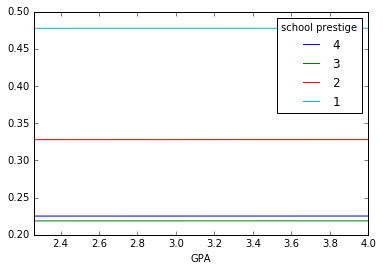

In [40]:
GPAG.plot()
plt.legend(['4','3','2','1'],title='school prestige')

In [44]:
GREG = results.pivot_table(values=["Prediction SciKit"], index=["GRE"], columns=['prestige_1.0','prestige_2.0','prestige_3.0'], \
                           aggfunc = np.mean)
GREG.head(10)

Prediction SciKit                              
prestige_1.0                 0                             1
prestige_2.0                 0                   1         0
prestige_3.0                 0         1         0         0
GRE                                                         
220.000000            0.151864  0.147024  0.232704  0.365298
284.444444            0.165528  0.160335  0.251485  0.389350
348.888889            0.180160  0.174604  0.271245  0.413952
413.333333            0.195782  0.189855  0.291953  0.438992
477.777778            0.212408  0.206107  0.313561  0.464346
542.222222            0.230041  0.223366  0.336009  0.489885
606.666667            0.248677  0.241630  0.359224  0.515478
671.111111            0.268296  0.260886  0.383117  0.540989
735.555556            0.288867  0.281108  0.407589  0.566288
800.000000            0.310347  0.302256  0.432527  0.591245

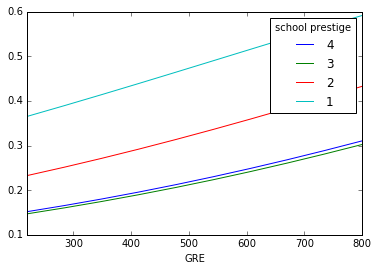

In [45]:
GREG.plot()
plt.legend(['4','3','2','1'],title='school prestige')

In [43]:
GPAdeux = results
GPAdeux = GPAdeux.groupby(["GPA","GRE"])
GPAdeux.head()

,GRE,GPA,prestige_1.0,prestige_2.0,prestige_3.0,intercept,Prediction Statsmodels,Prediction SciKit
0,220,2.260000,1,0,0,1,0.164173,0.365261
1,220,2.260000,0,1,0,1,0.090492,0.232675
2,220,2.260000,0,0,1,1,0.048977,0.147004
3,220,2.260000,0,0,0,1,0.039890,0.151844
4,220,2.453333,1,0,0,1,0.185907,0.365269
5,220,2.453333,0,1,0,1,0.103682,0.232682
6,220,2.453333,0,0,1,1,0.056492,0.147008
7,220,2.453333,0,0,0,1,0.046078,0.151848
8,220,2.646667,1,0,0,1,0.209795,0.365277
9,220,2.646667,0,1,0,1,0.118543,0.232688
